In [ ]:
---
<h2 style="text-align: center;">Olubukola K Ogunniyi</h2> 
<h2 style="text-align: center;">A1: Linear Modeling Case Study</h2>   
<h4 style="text-align: center;">Computational Data Analytics with Python - DAT-5390 - FMBAN1</h4>
<p style="text-align: center;">Prof Chase Kusterer <br>
Hult International Business School</p>
---

1 Introduction
The rapid expansion of the bike-sharing industry, now valued at an estimated $2.8 billion globally as of 2023, underscores its increasing significance in urban mobility and sustainability. Factors fueling this growth include the convenience of accessing bikes, the appeal of an eco-friendly transportation alternative, and the health benefits associated with cycling. In response to this burgeoning demand, the Cook County Planning and Development Department, overseeing the bustling Chicago metropolitan area, seeks to leverage data-driven insights to optimize their bike-sharing services. They have commissioned the development of a sophisticated machine learning model capable of accurately forecasting daily bike rental volumes. This initiative aims not only to enhance operational efficiency but also to unearth key drivers influencing rental patterns, thereby facilitating more informed decision-making and strategic planning in meeting the city's transportation needs.

1.1 Package and Dataset Imports

In [117]:
## importing libraries ##
import pandas as pd  # data science essentials
import numpy as np   
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.pyplot as plt  # basic data visualization
import seaborn as sns            # enhanced data visualization
import statsmodels.formula.api as smf  # statistical models including linear regression
import sklearn.linear_model  # contains linear modeling algorithms
from sklearn.model_selection import train_test_split  # splitting data into train and test sets
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # feature scaling and encoding categorical variables
from sklearn.impute import SimpleImputer  # handling missing values
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  # various linear models
from sklearn.neighbors import KNeighborsRegressor #  KNeighbors for regression
from sklearn.tree import DecisionTreeRegressor  # decision tree for regression
from sklearn.ensemble import RandomForestClassifier  # random forest for classification
from sklearn.metrics import mean_squared_error, r2_score  # metrics for regression model evaluation
from math import sqrt  # additional math functions, used here for square root calculation
from sklearn.model_selection import RandomizedSearchCV

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## importing data ##

# reading modeling data into Python
modeling_data = "C:\\Users\\lones\\Downloads\\Kaggle Files (Updated) (3)\\Kaggle Files (Updated)\\datasets\\train.xlsx"

# calling this df_train
df_train = pd.read_excel(io         = modeling_data,
                         sheet_name = 'data',
                         header     = 0,
                         index_col  = 'ID')



# reading testing data into Python
testing_data = "C:\\Users\\lones\\Downloads\\Kaggle Files (Updated) (3)\\Kaggle Files (Updated)\\datasets\\test.xlsx"


# calling this df_test
df_test = pd.read_excel(io         = testing_data,
                        sheet_name = 'data',
                        header     = 0,
                        index_col  = 'ID')

Concatenating datasets to combining the datasets to create a single dataset.

In [118]:
# concatenating datasets together for mv analysis and feature engineering
df_train['set'] = 'Not Kaggle'
df_test ['set'] = 'Kaggle'

# concatenating both datasets together for mv and feature engineering
df_full = pd.concat(objs = [df_train, df_test],
                    axis = 0,
                    ignore_index = False)


# checking data
df_full.head(n = 5)

,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS,set
ID,,,,,,,,,,,,,
mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519.0,Not Kaggle
mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251.0,Not Kaggle
mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685.0,Not Kaggle
mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0.0,Not Kaggle
mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814.0,Not Kaggle


In [66]:
# checking available features
df_full.columns

Index(['DateHour', 'Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'RENTALS', 'set'], dtype='object')

In [67]:
#Encode the 'Holiday' and 'FunctioningDay' as numeric using a binary encoding
df_full['Holiday'] = df_full['Holiday'].map({'No': 0, 'Yes': 1})
df_full['FunctioningDay'] = df_full['FunctioningDay'].map({'No': 0, 'Yes': 1})

In [68]:
# Setting the response variable as string
y_variable = 'RENTALS' 

Missing Value Analysis and Imputation

In [69]:
# Checking for missing values
df_full.isnull().sum()

DateHour                    0
Temperature(F)              0
Humidity(%)                 0
Wind speed (mph)            0
Visibility(miles)          76
DewPointTemperature(F)     67
Rainfall(in)                0
Snowfall(in)                0
SolarRadiation(MJ/m2)     106
Holiday                     0
FunctioningDay              0
RENTALS                   546
set                         0
dtype: int64

In [70]:
# Mean imputation to handle missing values in dataset 
df_full['Visibility(miles)'].fillna(df_full['Visibility(miles)'].mean(), inplace=True)
df_full['DewPointTemperature(F)'].fillna(df_full['DewPointTemperature(F)'].mean(), inplace=True)
df_full['SolarRadiation(MJ/m2)'].fillna(df_full['SolarRadiation(MJ/m2)'].mean(), inplace=True)
df_full['RENTALS'].fillna(df_full['RENTALS'].mean(), inplace=True)

In [71]:
# Checking for missing values again
df_full.isnull().sum()

DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
RENTALS                   0
set                       0
dtype: int64

### 2.2 Summary Statistics

In [72]:
# Summary statistics for numerical variables
sns.set(style="whitegrid")  # Setting visualization style
df_full.describe()

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,57.389652,59.228480,3.344780,9.646964,42.036089,0.004858,0.002015,0.547161,0.054945,0.886905,828.153846
std,12.861669,18.686445,2.071144,3.431081,13.781186,0.037354,0.018550,0.790639,0.227925,0.316782,569.454691
min,26.000000,13.000000,0.000000,0.000000,-2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,44.000000,1.800000,7.600000,33.600000,0.000000,0.000000,0.000000,0.000000,1.000000,441.750000
50%,57.000000,59.000000,2.900000,11.400000,42.036089,0.000000,0.000000,0.030000,0.000000,1.000000,828.153846
75%,68.000000,74.000000,4.500000,12.400000,51.100000,0.000000,0.000000,0.900000,0.000000,1.000000,1043.500000
max,91.000000,97.000000,12.800000,12.400000,75.000000,0.710000,0.300000,3.180000,1.000000,1.000000,3303.000000


2.4 Data Visualization 
Histogram: Right positive skewdness noticed for Rentals. This means, in the distribution, the mean and median is greater than the mode, and the bulk of the data points lie to the left of the histogram, with fewer large values to the right.

Box Plot for the effect of holidays on Rental 
Median Rental Counts: The median number of rentals (indicated by the line inside the box) on non-holidays appears to be lower than on holidays. This suggests that, typically, there are more rentals on holidays.

Interquartile Range (IQR): The IQR, which is the height of the box, represents the middle 50% of the data. It seems slightly wider for holidays compared to non-holidays, indicating more variability in the number of rentals on holidays.

Outliers: The plot shows several outliers for both non-holidays and holidays (indicated by the dots above the whiskers). There are particularly high rental counts on non-holiday days that are well above the rest of the data, suggesting occasional spikes in rentals when it's not a holiday.

Scatter plot to explore relationship between temperature (in Fahrenheit) and the number of bike rentals. 
Positive Correlation: There seems to be a positive correlation between temperature and bike rentals. As the temperature increases, the number of rentals also tends to increase, which is logical considering that warmer weather is more conducive to outdoor activities like biking.

Data Spread: The data points are more densely packed at moderate temperatures, suggesting that there's a range of temperatures where bike rentals are most common. It appears that as the temperature moves towards the extremes (especially colder), the number of rentals decreases.

Outliers: There are a few instances with high rental counts at moderate temperatures, indicating days with particularly high demand. These could be outliers or could represent specific days with events or other factors that drive up rentals.

Decreased Rentals in Higher Temperature Range: Towards the higher end of the temperature range, there seems to be a slight decrease in the number of rentals. This could suggest that extremely high temperatures may deter people from renting bikes due to discomfort or health concerns.

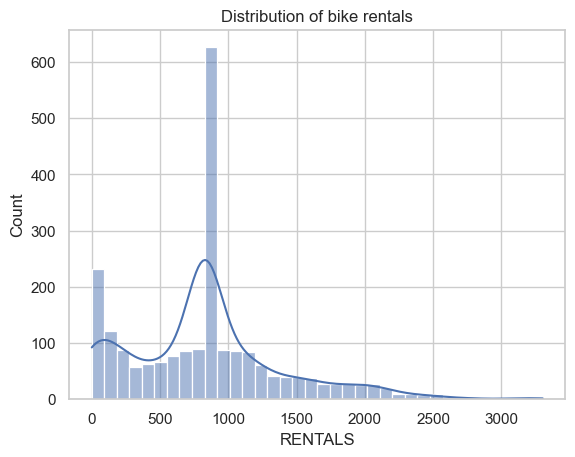

In [80]:
# Developing histogram for Rentals
sns.histplot(data   = df_full,
          x      = "RENTALS",
          kde    = True) #the curve 

# title and axis labels
plt.title(label   = "Distribution of bike rentals")
plt.xlabel(xlabel = "RENTALS") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

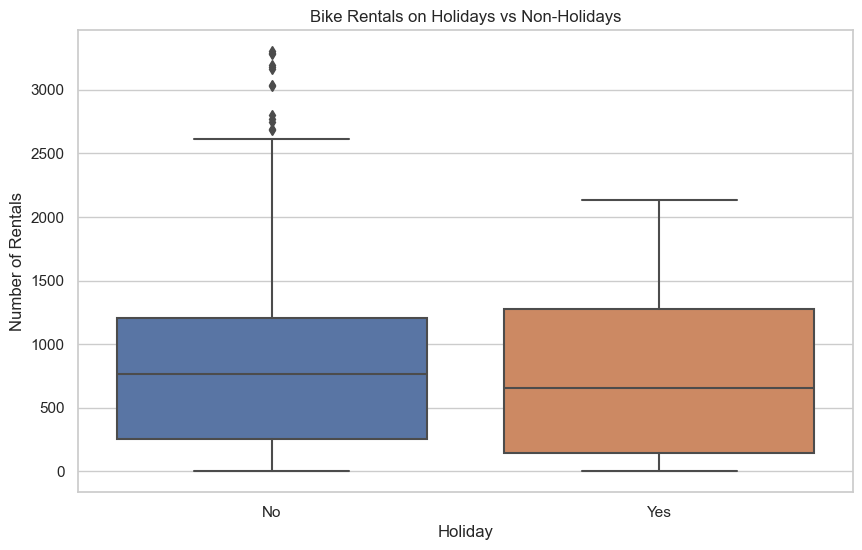

In [83]:
# Creating a boxplot to compare the number of rentals on holidays vs. non-holidays
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Holiday', y='RENTALS', data=df_full)

# Adding title and labels
plt.title('Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Number of Rentals')

# Displaying the plot
plt.show()

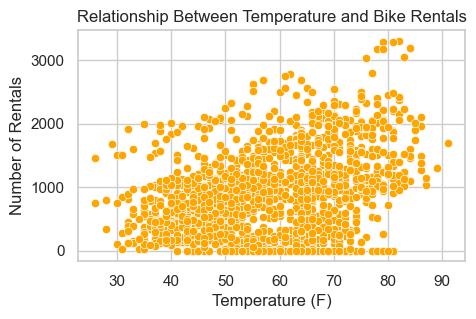

In [86]:
# Creating a scatter plot to explore the relationship between temperature and number of bike rentals
plt.figure(figsize=(5, 3))  # Set the figure size
sns.scatterplot(x='Temperature(F)', y='RENTALS', data=df_full, color='orange')

# Adding title and labels
plt.title('Relationship Between Temperature and Bike Rentals')
plt.xlabel('Temperature (F)')
plt.ylabel('Number of Rentals')

# Displaying the plot
plt.show()

In [87]:
# Transformation
# log transforming Rentals and saving it to the dataset
df_full['log_RENTALS'] = np.log1p(df_full['RENTALS'])

In [ ]:
Correlation Analysis

In [88]:
## Base Modeling ##
# Exclude non-numeric columns from the DataFrame before calculating correlation
numeric_df_full = df_full.select_dtypes(include=[np.number])

# Calculate Pearson correlation on the numeric-only DataFrame
df_corr = numeric_df_full.corr(method='pearson').round(2)

# Sort the correlation values of all variables with 'RENTALS' and 'log_RENTALS', descending by 'RENTALS'
corr_rentals = df_corr.loc[:, ['RENTALS', 'log_RENTALS']].sort_values(by='RENTALS', ascending=False)

# Display the sorted correlation values
print(corr_rentals)

                        RENTALS  log_RENTALS
RENTALS                    1.00         0.72
log_RENTALS                0.72         1.00
Temperature(F)             0.32         0.02
SolarRadiation(MJ/m2)      0.21         0.11
Wind speed (mph)           0.19         0.05
DewPointTemperature(F)     0.03        -0.13
Visibility(miles)          0.00         0.01
Snowfall(in)              -0.09        -0.03
Rainfall(in)              -0.15        -0.15
Humidity(%)               -0.40        -0.24


### 3 Feature Engineering 
Given the objective to predict bike rentals demand, the following four new features could potentially enhance the model's performance by capturing additional variance or underlying patterns in bike rental behaviour.

#### 1. Has_No_Rainfall
The day of the week could influence rental patterns. Weekends possibly showing different trends compared to weekdays. Weekends typically exhibit a shift in rental patterns due to the absence of regular commutes and an increase in recreational use. Understanding this distinction helps tailor predictions to the day of the week. Rental durations might also differ, with longer rentals more common on weekends when users have more free time for leisurely rides.

#### 2. Has_No_Snowfall
Different months of the year have different temperature. Given the temperature data, we can infer the season, which could significantly affect rental patterns due to weather conditions. Seasonal changes directly affect weather conditions, daylight hours, and social behaviour, all of which influence bike rental demand. For example, warmer months might see an increase in rentals due to more favourable biking conditions and outdoor activities, while colder or rainy seasons could deter users. Recognizing seasonal trends helps in forecasting demand fluctuations throughout the year and adjusting supply accordingly.

#### 3. Has_Low_SolarRadiation
Using temperature, humidity, and solar radiation, we can create a simple categorization of weather conditions, which may influence rental patterns. This is more nuanced and can range from "Good" to "Poor" based on certain thresholds of these variables. Weather conditions such as temperature, humidity, and precipitation significantly impact people's willingness and ability to rent bikes. For instance, very high or low temperatures may reduce comfort, deterring rentals. Clear, sunny days are likely to encourage more bike rentals, while rainy or snowy conditions could lead to a sharp decrease in demand. By categorizing weather conditions, models can more accurately predict changes in rental patterns due to weather variability.

New Feature Engineering

In [89]:
## Feature Engineering ##
# Placeholder variables
df_full['has_No_Rainfall'] = 0
df_full['has_No_Snowfall'] = 0
df_full['has_Low_SolarRadiation'] = 0

# iterating over each row in the DataFrame to
# change values in the new feature columns
for index, row in df_full.iterrows():

    # Rainfall - if there is no rainfall, set 'has_No_Rainfall' to 1
    if row['Rainfall(in)'] == 0:
        df_full.loc[index, 'has_No_Rainfall'] = 1
        
    # Snowfall - if there is no snowfall, set 'has_No_Snowfall' to 1
    if row['Snowfall(in)'] == 0:
        df_full.loc[index, 'has_No_Snowfall'] = 1
        
    # SolarRadiation - if the solar radiation is low, set 'has_Low_SolarRadiation' to 1
    # Assuming 'low' solar radiation is defined as a certain threshold, for example, less than 0.5 MJ/m2
    if row['SolarRadiation(MJ/m2)'] < 0.5:
        df_full.loc[index, 'has_Low_SolarRadiation'] = 1

In [90]:
# checking results
bike[  ['has_No_Rainfall', 'has_No_Snowfall', 'has_Low_SolarRadiation']  ].head(n = 5)

,has_No_Rainfall,has_No_Snowfall,has_Low_SolarRadiation
0,1,1,1
1,1,1,0
2,1,1,1
3,1,1,0
4,1,1,0


Checking the correlations of the newly-engineered features with RENTALS and log_RENTALS.

In [91]:
# Exclude non-numeric columns from the DataFrame before calculating correlation
numeric_df_full = df_full.select_dtypes(include=[np.number])

# Calculate Pearson correlation on the numeric-only DataFrame
df_corr = numeric_df_full.corr(method='pearson').round(2)

# Focus on the new features and their correlation with 'RENTALS' and 'log_RENTALS'
if 'RENTALS' in df_corr.columns and 'log_RENTALS' in df_corr.columns:
    # Extract correlations of new features with 'RENTALS' and 'log_RENTALS'
    specific_corr = df_corr.loc[['has_No_Rainfall', 'has_No_Snowfall', 'has_Low_SolarRadiation'], ['RENTALS', 'log_RENTALS']]
    
    # Display the specific correlations
    print(specific_corr)
else:
    print("Ensure 'RENTALS' and 'log_RENTALS' are numeric and present in the DataFrame")

                        RENTALS  log_RENTALS
has_No_Rainfall            0.21         0.17
has_No_Snowfall            0.09         0.02
has_Low_SolarRadiation    -0.18        -0.07


In [ ]:
Dataset standardization 

In [92]:
## Standardization ##
numeric_df_full = df_full.select_dtypes(include=[np.number])

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numeric features and transform them
scaled_features = scaler.fit_transform(numeric_df_full)

# Create a new DataFrame with the scaled features
scaled_df_full = pd.DataFrame(scaled_features, columns=numeric_df_full.columns)

In [ ]:
Separating the Kaggle Data

In [93]:
## parsing out testing data (needed for later) ##

# dataset for kaggle
kaggle_data = df_full[ df_full['set'] == 'Kaggle' ].copy()


# dataset for model building
df = df_full[ df_full['set'] == 'Not Kaggle' ].copy()


# dropping set identifier (kaggle)
kaggle_data.drop(labels = 'set',
                 axis = 1,
                 inplace = True)


# dropping set identifier (model building)
df.drop(labels = 'set',
        axis = 1,
        inplace = True)

In [ ]:
Train-Test Split

In [94]:
# Setting x variable as a list 
x_features = ['Temperature(F)','Humidity(%)','Wind speed (mph)','Visibility(miles)','DewPointTemperature(F)','Rainfall(in)','Snowfall(in)','SolarRadiation(MJ/m2)','Holiday','FunctioningDay','has_No_Rainfall', 'has_No_Snowfall','has_Low_SolarRadiation'] 

In [95]:
# prepping data for train-test split
y_data = df[y_variable]


# removing non-numeric columns and missing values
x_data = df[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)


# storing remaining x_features after the step above
x_features = list(x_data.columns)


# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702 )


# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {df.shape[0]}
Features  (Columns): {df.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 1638
Features  (Columns): 16


Training Data (X-side)
----------------------
Observations (Rows): 1228
Features  (Columns): 8


Training Data (y-side)
----------------------
Feature Name:        RENTALS
Observations (Rows): 1228


Testing Data (X-side)
---------------------
Observations (Rows): 410
Features  (Columns): 8


Testing Data (y-side)
---------------------
Feature Name:        RENTALS
Observations (Rows): 410


 Candidate Model Development
Candidate model development refers to the process of selecting, training, and evaluating a set of potential machine learning models to identify which model(s) perform best for a specific predictive task. 
1.	Selection of Models: Identifying a range of models that are theoretically suitable for the problem at hand, based on the nature of the data and the prediction task. The selected models are OLS Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, K-Nearest Neighbors (KNN), and Decision Tree Regressor. Each model is suited for regression tasks with different regularization techniques (Lasso, Ridge, Elastic Net) to prevent overfitting, and varying approaches to capture the data's underlying patterns (KNN and Decision Trees).
2.	Training: Fitting each selected model to a portion of the data (the training set) to learn the relationship between features and the target variable.
3.	Evaluation: Assessing each model's performance using a separate portion of the data (the test set) and specific metrics (like RMSE and R2) to gauge how well the model predicts the target variable.
4.	Comparison: Comparing the performance metrics across all candidate models to determine which model(s) offer the best predictive accuracy and generalization capability.
In conclusion, the Decision Tree Regressor's superior performance is attributed to its lower RMSE and higher R2 values, indicating greater accuracy and a better fit to the bike rental data compared to the other models. Its inherent flexibility and capacity to model complex relationships without stringent data preprocessing requirements further underscore its suitability for this prediction task.

Developing candidate models 

In [105]:
## Candidate Modeling ##

# Naming the model
model_name = 'Lasso Regression'

# Initialize your model
model = Lasso()

In [103]:
# Naming the model
model_name = 'Ridge Regression'

# Initialize your model
model = Ridge()

In [101]:
# Naming the model
model_name = 'K-Nearest Neighbors'

# Initialize your model
model = KNeighborsRegressor()

In [99]:
# Naming the model
model_name = 'Decision Tree Regressor'

# Initialize your model
model = DecisionTreeRegressor()

In [106]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Lasso Regression
Train_Score:    0.2533
Test_Score:     0.258
Train-Test Gap: 0.0047



In [ ]:
Model Results

In [ ]:
## Model Results ##
Model Name:     'Lasso Regression'
Train_Score:    0.2533
Test_Score:     0.258
Train-Test Gap: 0.0047

Model Name:     'Ridge Regression'
Train_Score:    0.2536
Test_Score:     0.2591
Train-Test Gap: 0.0055
    
Model Name:     'K-Nearest Neighbors'
Train_Score:    0.4462
Test_Score:     0.195
Train-Test Gap: 0.2512
    
Model Name:     'Decision Tree Regressor'
Train_Score:    0.999
Test_Score:     -0.2405
Train-Test Gap: 1.2395

Analysis of model results
Lasso Regression
Underfitting: The low R^2 scores for both training and testing imply that the model may be underfitting the data. Underfitting occurs when the model is too simple to capture the underlying patterns in the data.
Generalization: Despite the low R^2 scores, the model is generalizing well from the training data to the test data, as evidenced by the very small train-test gap.
Complexity and Features: Lasso Regression includes a penalty term that can shrink coefficients of less important features to zero, effectively performing feature selection. If the R^2 score is low, it could be that the model is too simple, the penalty term is too strong, or important features are missing or not captured properly.

Ridge Regression
Performance: The Ridge Regression model's performance is marginally better than the Lasso Regression model in terms of both training and testing scores. This indicates that the regularization technique used by Ridge (L2 regularization) may be more suitable for this dataset than the Lasso's L1 regularization.
Underfitting: Despite the good generalization, the low R^2 scores for both training and testing suggest that the model may be underfitting, meaning it is too simple to capture the complexity of the data.

K-Nearest Neighbors
Overfitting: The large train-test gap is a clear sign of overfitting. KNN is sensitive to the local structure of the training data, and without the right value for k (the number of nearest neighbors), it can adapt too closely to the training data, capturing noise that does not generalize.
Model Complexity: In KNN, a smaller value of k means that noise will influence the outcome more, while a larger k provides smoothing that reduces overfitting. The current results suggest that the k value may be too low.
Distance Metric and Scaling: KNN is also sensitive to the distance metric used and the scale of the data. If the features are not on the same scale, it can disproportionately influence the KNN algorithm's outcome. Ensuring that the data is properly scaled can be crucial for KNN performance.

Decision Tree Regressor
Overfitting Problem: The decision tree model has learned the training data's noise and details, which do not generalize to the test data. This is evidenced by the extremely high training score and the very poor testing score.
Model Complexity: Decision trees are prone to creating overly complex trees that do not generalize well. The tree may have grown too deep, creating leaves that represent outliers or noise in the training data.

In [ ]:
Residual Analysis

In [107]:
## Residual Analysis ##

# organizing residuals
model_residuals = {"True"            : y_test,
                   "Predicted"       : model_pred
                  }


# converting residuals into df
model_resid_df = pd.DataFrame(data = model_residuals)


# checking results
model_resid_df.head(n = 5)

,True,Predicted
ID,,
mb_1509,908.0,822.416761
mb_559,131.0,91.372718
mb_040,1208.0,1213.910785
mb_1346,291.0,624.945138
mb_1463,1433.0,731.992445


In [ ]:
Hyperparameter Tuning

In [108]:
# regression trees
from sklearn.tree import plot_tree                     # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
import warnings 

# Adjusting the hyperparameter ranges
criterion_range = ["squared_error", "friedman_mse", "absolute_error"]
splitter_range  = ["best", "random"]
depth_range     = np.arange(3, 20, 2)  # Expanded and refined range
leaf_range      = np.arange(10, 50, 5)  # More focused range based on previous best

# Updated hyperparameter grid
param_grid = {
    'criterion': criterion_range,
    'splitter': splitter_range,
    'max_depth': depth_range,
    'min_samples_leaf': leaf_range
}

# Adjusting the n_iter for RandomizedSearchCV could potentially improve results
# Consider increasing n_iter if computational resources permit

              #'NAME OF HYPERPARAMETER' : HYPERPARAMETER_RANGE,
              #'NAME OF HYPERPARAMETER' : HYPERPARAMETER_RANGE,
              #'NAME OF HYPERPARAMETER' : HYPERPARAMETER_RANGE}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeRegressor(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid, #hyper parameter range
                                   cv                    = 5,          #non of folds
                                   n_iter                = 432,        #how many models to build
                                   random_state          = 702)


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(5))

Tuned Parameters  : {'splitter': 'best', 'min_samples_leaf': 25, 'max_depth': 5, 'criterion': 'squared_error'}
Tuned Training AUC: 0.27344


In [109]:
# naming the model
model_name ='Tuned Tree'


# INSTANTIATING a logistic regression model with tuned values
model = DecisionTreeRegressor (splitter       = 'best',
                            min_samples_leaf  =  18,
                             max_depth        =  8, 
                             criterion        = 'squared_error',
                             random_state     = 702)


# FITTING to the TRAINING data
model.fit(x_train, y_train)


# PREDICTING based on the testing set
model.predict(x_test)


# SCORING results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)          

Training Score : 0.4021
Testing Score  : 0.2936
Train-Test Gap : 0.1085


Preparing Submission File for Kaggle

In [114]:
# x-data
x_data_kaggle = kaggle_data[x_features].copy()


# y-data
y_data_kaggle = kaggle_data[y_variable]


# Fitting model from above to the Kaggle test data
kaggle_predictions = model.predict(x_data_kaggle)

In [ ]:
# Creating the Kaggle file 

In [115]:
## Kaggle Submission File ##

# organizing predictions
model_predictions = {"RENTALS" : kaggle_predictions}


# converting predictions into df
model_pred_df = pd.DataFrame(data  = model_predictions,
                             index = df_test.index)

In [120]:
# Saving the DataFrame to a CSV file in the current working directory
model_pred_df.to_csv(path_or_buf="rental_bikes_prediction_final.csv", index=False)